In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters
import scipy.ndimage as ndi
import os

(512, 512)


(-0.5, 511.5, 511.5, -0.5)

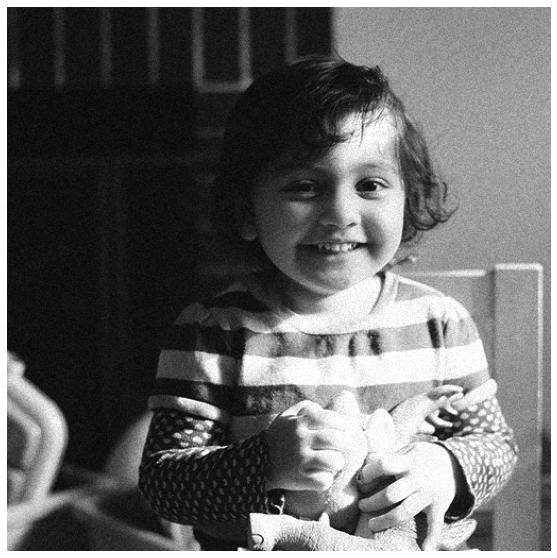

In [2]:
image = io.imread(r'U:\work\Slides\noisy.jpg')
print(image.shape)
fig = plt.figure(figsize=[10,10])
plt.imshow(image,'gray')
plt.axis('off')

In [3]:
filt = np.ones([3,3])/9
out = ndi.convolve(image,filt,mode='constant')

(512, 512)


(-0.5, 511.5, 511.5, -0.5)

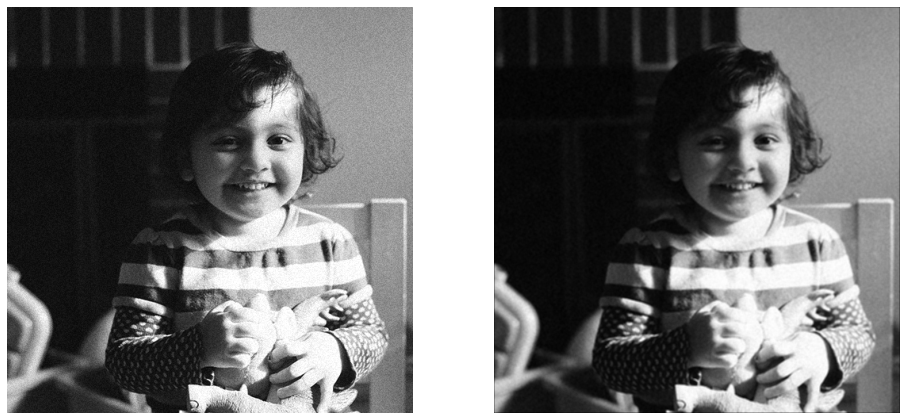

In [4]:
print(out.shape)
fig,(orig,filt)= plt.subplots(ncols=2, figsize=(16, 8))
orig.imshow(image,'gray')
orig.axis('off')

filt.imshow(out,'gray')
filt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

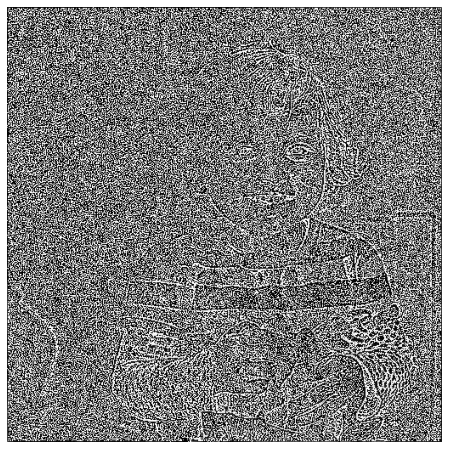

In [5]:
#io.imsave('denoised.jpg',out)
diff = np.abs(image-out)

fig = plt.figure(figsize=[8,8])
plt.imshow(diff,'gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

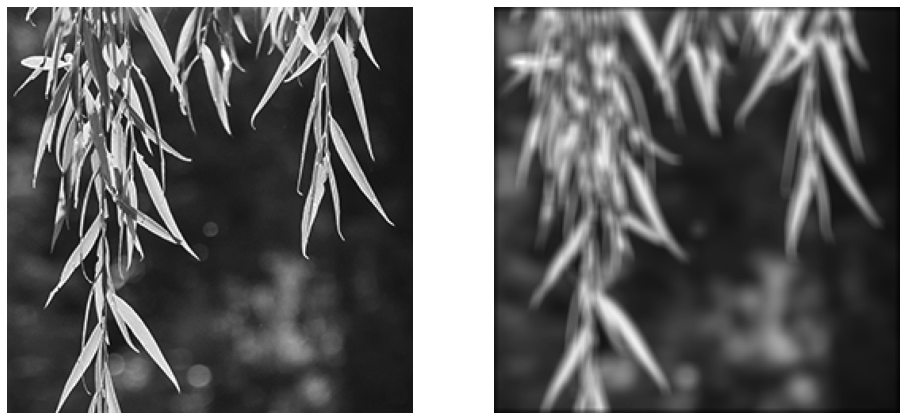

In [16]:
image = io.imread(r'U:\work\Slides\willow.jpg')
image = np.float32(image)
filt = np.ones([7,7]) / 49

#out = ndi.convolve(image,filt,mode='constant')
out = ndi.correlate(image,filt,mode='constant')

#Normalizing to 0 - 255
out = out - np.amin(out)
out = out / np.amax(out)
out = np.uint8(out*255)
fig,(orig,filt)= plt.subplots(ncols=2, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

filt.imshow(out,'gray')
filt.axis('off')


In [18]:
### Gaussian Filter
def my_gaussian(sizex,sizey, sigma):
    x, y = np.mgrid[-sizex: sizex + 1, -sizey: sizey + 1]
    g = np.exp(- (x ** 2/float(sizex) + y ** 2 / float(sizey)) / (2 * sigma ** 2))
    g = g / np.sqrt(2 * np.pi * sigma)
    g = g / np.sum(g)
    return g


[[0.01247764 0.02641517 0.03391775 0.02641517 0.01247764]
 [0.02641517 0.05592091 0.07180387 0.05592091 0.02641517]
 [0.03391775 0.07180387 0.09219799 0.07180387 0.03391775]
 [0.02641517 0.05592091 0.07180387 0.05592091 0.02641517]
 [0.01247764 0.02641517 0.03391775 0.02641517 0.01247764]]


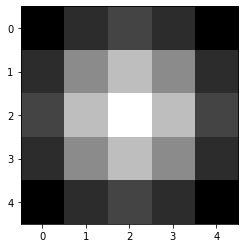

In [19]:
filt = my_gaussian(2,2,1)
print(filt)
plt.imshow(filt,'gray')

(-0.5, 255.5, 255.5, -0.5)

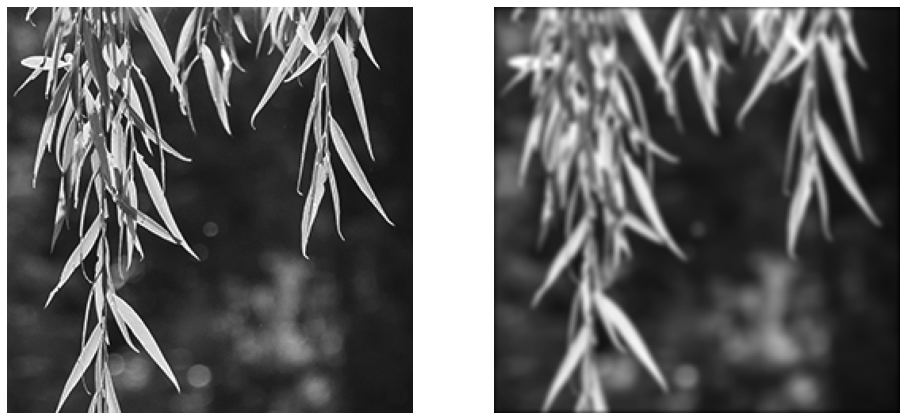

In [20]:
image = io.imread(r'u:\work\Slides\willow.jpg')
image = np.float32(image)
filt = my_gaussian(3,3,1)
#out = ndi.convolve(image,filt,mode='constant')
out = ndi.correlate(image,filt,mode='constant')

#Same thing can be done by
#out = filters.gaussian(image, sigma=1, mode='constant',truncate=3)

#Normalizing to 0 - 255
out = out - np.amin(out)
out = out / np.amax(out)
out = np.uint8(out*255)
fig,(orig,filt)= plt.subplots(ncols=2, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

filt.imshow(out,'gray')
filt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

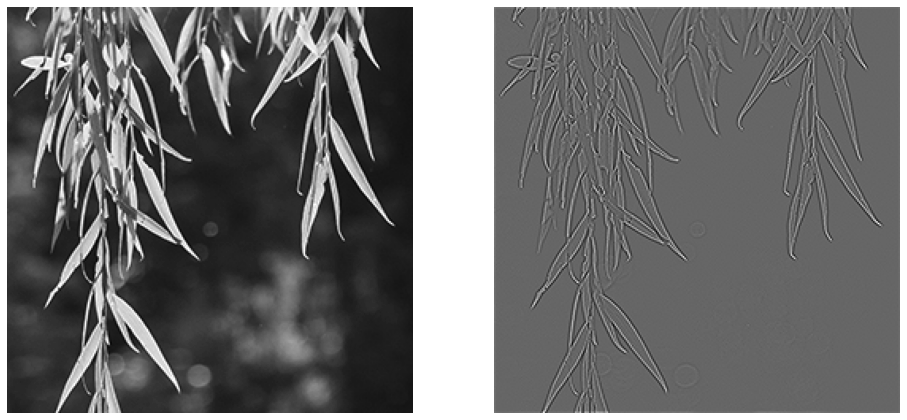

In [50]:
mage = io.imread(r'E:\OneDrive - Lake Forest College\Course Material\CS 450 Spring 2021\Slides\willow.jpg')
image = np.float32(image)

out1 = filters.gaussian(image, sigma=0.1, mode='constant',truncate=3)
out2 = filters.gaussian(image, sigma=0.2, mode='constant',truncate=3)
out = out1-out2

#Normalizing to 0 - 255
out = out - np.amin(out)
out = out / np.amax(out)
out = np.uint8(out*255)
fig,(orig,filt)= plt.subplots(ncols=2, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

filt.imshow(out,'gray')
filt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

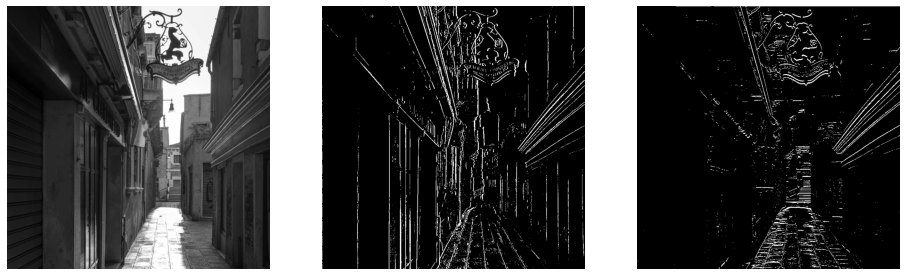

In [12]:
image = io.imread(r'U:\work\Slides\lane.jpg')
image = np.float32(image)
filt1 = np.array([[0,0,0],[-1,0,1],[0,0,0]])
filt2 = np.matrix.transpose(filt1)

out1 = ndi.correlate(image,filt1,mode='constant')
out2 = ndi.correlate(image,filt2,mode='constant')


fig,(orig,fil1,fil2)= plt.subplots(ncols=3, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

fil1.imshow(out1>20,'gray')
fil1.axis('off')

fil2.imshow(out2>20,'gray')
fil2.axis('off')


(-0.5, 799.5, 799.5, -0.5)

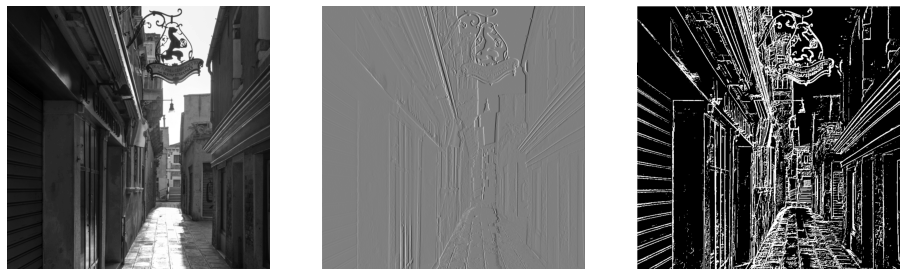

In [15]:
image = io.imread(r'u:\work\Slides\lane.jpg')
image = np.float32(image)
filt1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filt2 = np.matrix.transpose(filt1)

out1 = ndi.correlate(image,filt1,mode='constant')
out2 = ndi.correlate(image,filt2,mode='constant')


out = np.maximum(out1,out2)
out = out>20

fig,(orig,fil1,fil2)= plt.subplots(ncols=3, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

fil1.imshow(out1,'gray')
fil1.axis('off')

fil2.imshow(out,'gray')
fil2.axis('off')


